In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import matplotlib.pyplot as plt


In [0]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/semeion/semeion.data", header=None, sep=' ')
features = data[list(range(256))]
target = data[list(range(256, 266))].apply(lambda row: row.idxmax() % 256, axis=1)

In [0]:
target.value_counts()

1    162
6    161
4    161
0    161
5    159
3    159
2    159
9    158
7    158
8    155
dtype: int64

9


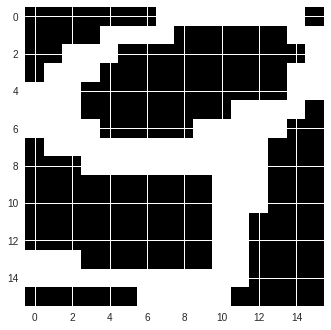

In [0]:
i = np.random.randint(0, len(features), 1)
print(target.loc[i].values[0])
plt.imshow(features.loc[i].values.reshape(16, 16), cmap='gray')
plt.show()

In [0]:
X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=.25, random_state=17, stratify=target.values)

In [0]:
%%time
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

CPU times: user 279 ms, sys: 3.43 ms, total: 282 ms
Wall time: 289 ms


In [0]:
metrics.accuracy_score(y_test, y_pred), \
metrics.accuracy_score(clf.predict(X_train), y_train), 

(0.9172932330827067, 0.9288107202680067)

In [0]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        40
           1       0.78      0.98      0.87        41
           2       0.89      1.00      0.94        40
           3       0.93      0.93      0.93        40
           4       0.90      0.95      0.93        40
           5       0.87      0.97      0.92        40
           6       0.97      0.95      0.96        40
           7       1.00      0.82      0.90        40
           8       1.00      0.77      0.87        39
           9       0.94      0.79      0.86        39

   micro avg       0.92      0.92      0.92       399
   macro avg       0.93      0.92      0.92       399
weighted avg       0.93      0.92      0.92       399



In [0]:
param_grid = {
    "n_neighbors": range(5, 50, 5),
    "metric": ["euclidean", "manhattan", "cosine"],
    "weights": ["uniform", "distance"]
}

In [0]:
%%time
cv = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=4, n_jobs=-1)
cv.fit(X_train, y_train)

CPU times: user 657 ms, sys: 80.3 ms, total: 737 ms
Wall time: 57.2 s


In [0]:
cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}

In [0]:
%%time
param_grid = {
    "n_neighbors": range(5, 10),
    "metric": ["euclidean"],
    "weights": ["distance"]
}

cv = GridSearchCV(clf, param_grid=param_grid, scoring='accuracy', cv=4, n_jobs=-1)
cv.fit(X_train, y_train)

CPU times: user 76.7 ms, sys: 4.94 ms, total: 81.7 ms
Wall time: 6.49 s


In [0]:
cv.best_params_

{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}

In [0]:
y_pred = cv.best_estimator_.predict(X_test)

In [0]:
metrics.accuracy_score(y_pred, y_test), \
metrics.accuracy_score(cv.best_estimator_.predict(X_train), y_train)

(0.9348370927318296, 1.0)

In [0]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.84      1.00      0.91        41
           2       0.91      0.97      0.94        40
           3       0.97      0.93      0.95        40
           4       0.93      0.95      0.94        40
           5       0.87      0.97      0.92        40
           6       0.98      1.00      0.99        40
           7       0.97      0.88      0.92        40
           8       1.00      0.82      0.90        39
           9       0.94      0.82      0.88        39

   micro avg       0.93      0.93      0.93       399
   macro avg       0.94      0.93      0.93       399
weighted avg       0.94      0.93      0.93       399



In [0]:
accs = []
for _ in range(100):
    X_train, X_test, y_train, y_test = train_test_split(features.values, target.values, test_size=.25, stratify=target.values)
    accs.append(metrics.accuracy_score(cv.best_estimator_.fit(X_train, y_train).predict(X_test), y_test))
np.mean(accs)

0.915513784461153